<a href="https://colab.research.google.com/github/Suvraneel/fcc-machine-learning-with-python/blob/fcc-practice/stockF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
cwd = os.getcwd()

In [4]:
!pip install jugaad-data

In [6]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [13]:
from datetime import date
from jugaad_data.nse import bhavcopy_save, bhavcopy_fo_save

# Download bhavcopy
bhavcopy_save(date(2020,1,1), "/content/drive/MyDrive/")

# Download bhavcopy for futures and options
bhavcopy_fo_save(date(2020,1,1), "/content/drive/MyDrive/")

# Download stock data to pandas dataframe
from jugaad_data.nse import stock_df
df = stock_df(symbol="SBIN", from_date=date(2019,1,1),
            to_date=date(2020,12,30), series="EQ")
df.head(15)


,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2020-12-30,EQ,278.00,278.70,272.50,277.90,275.50,276.90,275.47,339.85,149.45,30971894,8.531681e+09,163939,SBIN
1,2020-12-29,EQ,276.30,279.90,274.70,275.20,277.75,277.90,277.56,339.85,149.45,45032526,1.249925e+10,237470,SBIN
2,2020-12-28,EQ,268.75,276.00,268.00,266.85,275.75,275.20,272.23,339.85,149.45,36870242,1.003737e+10,203967,SBIN
3,2020-12-24,EQ,265.00,268.85,264.65,263.00,266.85,266.85,267.02,339.85,149.45,28585509,7.632821e+09,167695,SBIN
4,2020-12-23,EQ,256.95,263.90,255.60,257.45,263.00,263.00,261.14,339.85,149.45,29056404,7.587915e+09,171296,SBIN
5,2020-12-22,EQ,254.80,258.70,248.25,254.70,257.15,257.45,254.20,339.85,149.45,51189571,1.301228e+10,288750,SBIN
6,2020-12-21,EQ,268.45,269.00,251.05,271.45,254.10,254.70,260.31,339.85,149.45,55160758,1.435888e+10,311254,SBIN
7,2020-12-18,EQ,267.70,271.95,265.00,267.70,271.35,271.45,268.30,339.85,149.45,29816205,7.999718e+09,159604,SBIN
8,2020-12-17,EQ,270.00,272.15,266.70,269.40,267.35,267.70,269.19,339.85,149.45,25904699,6.973310e+09,146174,SBIN
9,2020-12-16,EQ,272.80,273.65,268.50,270.65,269.35,269.40,270.58,339.85,149.45,24844177,6.722276e+09,150489,SBIN


In [ ]:
# from nsepy import get_history
# from datetime import date
# data = get_history(symbol="SBIN", start=date(2019,1,1), end=date(2020,12,30))
# data[['Close']].plot()

In [15]:
# s = "/content/drive/MyDrive/nse_data_legacy.csv"
dataset_train = df
dataset_train = dataset_train.drop('SERIES', 1)
training_set = dataset_train.iloc[:, 1:2].values

In [17]:
# from datetime import date
# from nsepy import get_history
# sbin = get_history(symbol='SBIN',
#                    start=date(2019,1,1),
#                    end=date(2020,12,30))
# sbin.head(15)
dataset_train = pd.DataFrame(df)
dataset_train.head(15)

,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2020-12-30,EQ,278.00,278.70,272.50,277.90,275.50,276.90,275.47,339.85,149.45,30971894,8.531681e+09,163939,SBIN
1,2020-12-29,EQ,276.30,279.90,274.70,275.20,277.75,277.90,277.56,339.85,149.45,45032526,1.249925e+10,237470,SBIN
2,2020-12-28,EQ,268.75,276.00,268.00,266.85,275.75,275.20,272.23,339.85,149.45,36870242,1.003737e+10,203967,SBIN
3,2020-12-24,EQ,265.00,268.85,264.65,263.00,266.85,266.85,267.02,339.85,149.45,28585509,7.632821e+09,167695,SBIN
4,2020-12-23,EQ,256.95,263.90,255.60,257.45,263.00,263.00,261.14,339.85,149.45,29056404,7.587915e+09,171296,SBIN
5,2020-12-22,EQ,254.80,258.70,248.25,254.70,257.15,257.45,254.20,339.85,149.45,51189571,1.301228e+10,288750,SBIN
6,2020-12-21,EQ,268.45,269.00,251.05,271.45,254.10,254.70,260.31,339.85,149.45,55160758,1.435888e+10,311254,SBIN
7,2020-12-18,EQ,267.70,271.95,265.00,267.70,271.35,271.45,268.30,339.85,149.45,29816205,7.999718e+09,159604,SBIN
8,2020-12-17,EQ,270.00,272.15,266.70,269.40,267.35,267.70,269.19,339.85,149.45,25904699,6.973310e+09,146174,SBIN
9,2020-12-16,EQ,272.80,273.65,268.50,270.65,269.35,269.40,270.58,339.85,149.45,24844177,6.722276e+09,150489,SBIN


In [18]:
print(dataset_train.shape)
dataset_train.head(15)

(496, 15)


,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2020-12-30,EQ,278.00,278.70,272.50,277.90,275.50,276.90,275.47,339.85,149.45,30971894,8.531681e+09,163939,SBIN
1,2020-12-29,EQ,276.30,279.90,274.70,275.20,277.75,277.90,277.56,339.85,149.45,45032526,1.249925e+10,237470,SBIN
2,2020-12-28,EQ,268.75,276.00,268.00,266.85,275.75,275.20,272.23,339.85,149.45,36870242,1.003737e+10,203967,SBIN
3,2020-12-24,EQ,265.00,268.85,264.65,263.00,266.85,266.85,267.02,339.85,149.45,28585509,7.632821e+09,167695,SBIN
4,2020-12-23,EQ,256.95,263.90,255.60,257.45,263.00,263.00,261.14,339.85,149.45,29056404,7.587915e+09,171296,SBIN
5,2020-12-22,EQ,254.80,258.70,248.25,254.70,257.15,257.45,254.20,339.85,149.45,51189571,1.301228e+10,288750,SBIN
6,2020-12-21,EQ,268.45,269.00,251.05,271.45,254.10,254.70,260.31,339.85,149.45,55160758,1.435888e+10,311254,SBIN
7,2020-12-18,EQ,267.70,271.95,265.00,267.70,271.35,271.45,268.30,339.85,149.45,29816205,7.999718e+09,159604,SBIN
8,2020-12-17,EQ,270.00,272.15,266.70,269.40,267.35,267.70,269.19,339.85,149.45,25904699,6.973310e+09,146174,SBIN
9,2020-12-16,EQ,272.80,273.65,268.50,270.65,269.35,269.40,270.58,339.85,149.45,24844177,6.722276e+09,150489,SBIN


In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [20]:
X_train = []
y_train = []
for i in range(60, 496):
    X_train.append(training_set_scaled[i-60:i, 0])      # creating numpy array for keras
    y_train.append(training_set_scaled[i, 0])           # ds sliding win
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestRegressor
# # Init, fit, test Lasso Regressor
# forest = RandomForestRegressor()
# _ = forest.fit(X_train, y_train)
# forest.score(X_test, y_test)
# # Init the transformer
# rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=10)

# # Fit to the training data
# _ = rfe.fit(X_train, y_train)
# X_train.loc[:, rfe.support_]

# from sklearn import metrics
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report


# Do not run


# from sklearn.feature_selection import RFE
# from sklearn.svm import SVC,SVR
# svc = SVC(C=1, kernel='linear') 
# rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
# rfe.fit(X_train, y_train)

Building the LSTM  
In order to build the LSTM, we need to import a couple of modules from Keras:

    Sequential for initializing the neural network
    Dense for adding a densely connected neural network layer
    LSTM for adding the Long Short-Term Memory layer
    Dropout for adding dropout layers that prevent overfitting 

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout  #optional

In [29]:

regressor = Sequential()    # Init Model

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) #layer 1

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))     # return = false
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))     #last layer

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')      #adam = mean of sq. error b/w actual & predicted values

regressor.fit(X_train, y_train, epochs =80, batch_size = 32) # epoch = 100 #validation_data=None #shuffle=True

Epoch 1/80
14/14 [==============================] - 8s 112ms/step - loss: 0.1050
Epoch 2/80
14/14 [==============================] - 2s 110ms/step - loss: 0.0306
Epoch 3/80
14/14 [==============================] - 2s 112ms/step - loss: 0.0194
Epoch 4/80
14/14 [==============================] - 2s 111ms/step - loss: 0.0194
Epoch 5/80
14/14 [==============================] - 2s 112ms/step - loss: 0.0184
Epoch 6/80
14/14 [==============================] - 2s 110ms/step - loss: 0.0167
Epoch 7/80
14/14 [==============================] - 2s 114ms/step - loss: 0.0161
Epoch 8/80
14/14 [==============================] - 2s 114ms/step - loss: 0.0160
Epoch 9/80
14/14 [==============================] - 2s 110ms/step - loss: 0.0136
Epoch 10/80
14/14 [==============================] - 2s 113ms/step - loss: 0.0134
Epoch 11/80
14/14 [==============================] - 2s 108ms/step - loss: 0.0110
Epoch 12/80
14/14 [==============================] - 2s 115ms/step - loss: 0.0113
Epoch 13/80
14/14 [======

In [30]:
# test set
# dataset_test = pd.read_csv('/content/drive/MyDrive/testdata.csv')
# sbin_test = get_history(symbol='SBIN',
#                    start=date(2021,1,1),
#                    end=date(2021,11,1))   # YYYY/MM/DD
sbin_test = stock_df(symbol="SBIN", from_date=date(2021,1,1),
            to_date=date(2021,11,1), series="EQ")
dataset_test = pd.DataFrame(sbin_test)
dataset_test = dataset_test.drop('SERIES', 1)
real_stock_price = dataset_test.iloc[:, 1:2].values
print(dataset_test.shape)

(206, 14)


In [31]:
dataset_total = pd.concat((dataset_train['OPEN'], dataset_test['OPEN']), axis = 0)  #concat training & test dataset (since prev few day b4 test reqd)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 206):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)                 # reverse scaled views

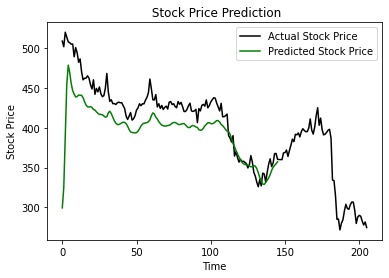

In [32]:
# Plot results
plt.plot(real_stock_price, color = 'black', label = 'Actual Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()